# Baseline correction tutorial

This Notebook demonstrates how the different baseline corrections in the ChromStream package work.

In [1]:
import chromstream as cs
from chromstream.data_processing import min_subtract, time_window_baseline, time_point_baseline, two_point_baseline

To visualize what the baselines do, we will generate a dataset with a drifting baseline and one peak.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a diagonal baseline from -1 to 1 and add a Gaussian peak between 1 and 2
time = np.arange(0, 6, 0.001)
baseline = np.linspace(-0.05, 0.05, len(time))
# Gaussian peak parameters
peak_center = 1.5
peak_width = 0.1
peak_amplitude = 2
gaussian_peak = peak_amplitude * np.exp(-0.5 * ((time - peak_center) / peak_width) ** 2)
# Only add the peak between 1 and 2
gaussian_peak[(time < 1) | (time > 2)] = 0

# Make a dataframe that contains the time and signal data (like your chromatogram)
data_preview = pd.DataFrame({
    'Time (min)': time,
    'Signal (a.u.)': baseline + gaussian_peak
})


Preview the data here:

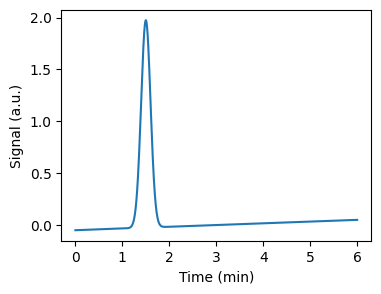

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(data_preview['Time (min)'], data_preview['Signal (a.u.)'])
ax.set_xlabel('Time (min)')
ax.set_ylabel('Signal (a.u.)')

plt.show()

To view the possible baseline subtractions, we can use the `list_baseline_functions` function. This Notebook explains how they work.

In [4]:
print(cs.list_baseline_functions())

min_subtract
time_window_baseline
time_point_baseline
two_point_baseline


## min_subtract function

The min subtract function subtracts the minimum value of the chromatogram from all values. This is useful when the baseline is approximately constant but not at zero.